# Description of algorithm

# Settings

In [1]:
settings = {
            'test_size': 0.25, # fraction of data set to be assigned as test data
            'del': True, # Delete variables that are no longer needed to proceed in computations to save place
            'filename_str': 'learning_curve.csv', # File for saving training and test RMSEs, this is appended to current date string (yymmdd)
            'random_state': { # Set random states so that the results are repeatable
                'shuffle': 42, # sklearn's shuffle method
                'split': 17 # sklearn's train_test_split method
            }
           }

# Use helper functions

In [2]:
%run ../src/helper_functions.py

Following functions has been loaded:

rmse



# Load data set and shuffle it

In [3]:
import numpy as np
import pandas as pd

In [4]:
PATH = "../../data/"
data_full = pd.read_csv(f'{PATH}train.tsv', sep='\t')

In [5]:
data_full.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## Shuffle

In [6]:
from sklearn.utils import shuffle
data_shuffled = shuffle(data_full, random_state=settings['random_state']['shuffle'])

if (settings['del']):
    del data_full

In [7]:
len(data_shuffled)

1482535

In [8]:
print("Number of unique fields:\n")

print("category_name: \t%d" % data_shuffled['category_name'].nunique())
print("brand_name: \t%d" % data_shuffled['brand_name'].nunique())
print()
print("%d items have no brand" % data_shuffled['brand_name'].isna().sum())
print("%d items have no category_name" % data_shuffled['category_name'].isna().sum())

Number of unique fields:

category_name: 	1287
brand_name: 	4809

632682 items have no brand
6327 items have no category_name


# Filter out samples that does not have category_name

In [9]:
data_reduced = data_shuffled.loc[data_shuffled['category_name'].notnull()]

if (settings['del']):
    del data_shuffled

In [10]:
# double check
print("%d items have no category_name" % data_reduced['category_name'].isna().sum())

0 items have no category_name


# Replace NaN in brand_name by 'No Brand'

In [11]:
data_reduced['brand_name'] = data_reduced['brand_name'].fillna('No Brand')

In [12]:
data_reduced

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
777341,777341,F/ship 4 Totoro Washi + 1 pen,1,Handmade/Paper Goods/Stationery,No Brand,12.0,1,This listing is for all 4 Totoro washi tape fo...
1463629,1463629,UCLA Men's Bundle + Shorts,1,Women/Other/Other,Adidas,76.0,1,7 items. 1: XL. 2: 2XL. 3:2XL. 4: XL. 5: 2XL. ...
350669,350669,Listing for lol,1,Beauty/Makeup/Lips,No Brand,12.0,1,- sunglasses and necklace :)
310222,310222,25 pcs kawaii sticker flakes,1,Kids/Toys/Arts & Crafts,No Brand,3.0,1,I ordered a bunch of stickers so you will reci...
759257,759257,Chanel Mini Lipgloss Set,2,Beauty/Makeup/Lips,Chanel,30.0,1,Brand new never used authentic Mini Lipgloss g...
288846,288846,Maroon Foamposites,3,Men/Shoes/Fashion Sneakers,Nike,225.0,1,9/10 Condition N Sz 12
1178450,1178450,INC studdedHeart Black Blouse Dolman,2,Women/Tops & Blouses/Blouse,INC International Concepts,16.0,1,New without tags INC International Concepts Sh...
726296,726296,Leggo silicone molds,3,Home/Kitchen & Dining/Bakeware,No Brand,12.0,0,I used these for my son's leggo birthday party...
840510,840510,Supreme Uzi Chain,1,Handmade/Accessories/Men,No Brand,15.0,1,10/10 New
1473033,1473033,Women Gold Palm Pendant Necklace FC,1,Vintage & Collectibles/Jewelry/Necklace,No Brand,17.0,1,High quality Immediate purchase Ok? Free shipp...


In [13]:
unique_cns = data_reduced.category_name.unique() # array of unique category names

In [101]:
cat_name = unique_cns[756]
print(cat_name)
data_filtered_cn = data_reduced.loc[data_reduced.category_name == cat_name]
print("Number of unique brands:", data_filtered_cn.brand_name.nunique())
print("Number of items:", len(data_filtered_cn))

Kids/Health & Baby Care/Teething Relief
Number of unique brands: 4
Number of items: 101


In [102]:
data_filtered_cn.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
81987,81987,Hyland's Teething Tablets,1,Kids/Health & Baby Care/Teething Relief,Hyland's,8.0,1,No description yet
440206,440206,Teething Nursing Necklace Jewelry Beads,1,Kids/Health & Baby Care/Teething Relief,No Brand,8.0,1,"Little LoStelle silicone necklaces, bracelets ..."
345665,345665,Nuby Teething Key Ring Bundle,1,Kids/Health & Baby Care/Teething Relief,Nuby,10.0,1,BPA free by the number one teether brand nuby!...
731783,731783,NWOT Nursing/Teething Necklace,2,Kids/Health & Baby Care/Teething Relief,No Brand,5.0,1,"Used only a couple times No flaws, I just got ..."
372516,372516,Silicone Fox Teether Teething Clip on,1,Kids/Health & Baby Care/Teething Relief,No Brand,22.0,1,Beads and pendant are made from 100% non-toxic...


In [103]:
brands = data_filtered_cn.brand_name.unique() # array of unique category names

brand_means = {} # dictionary to store mean price for every brand in the given category
for b in brands:
    data_brand = data_filtered_cn.loc[data_filtered_cn['brand_name'] == b] # data frame containing only one specific brand for one category
    mean = data_brand.price.mean()
    brand_means[b] = mean

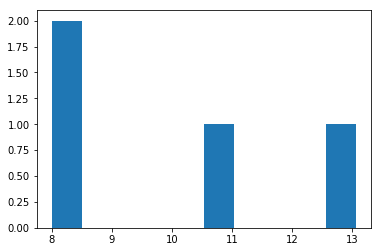

In [104]:
import matplotlib.pyplot as plt
plt.hist(brand_means.values())
plt.show()
# brand_means.values()

In [105]:
lst = list(brand_means.values())
np.median(lst)

9.5

In [106]:
np.mean(lst)

10.018041237113401

# Data preparation

## Represent the rest of the fields numerically

### train_id: copy

Create new DataFrame called data_num for numerical representations

In [ ]:
data_num = pd.DataFrame(data_filtered_cn.loc[:,'train_id'], columns=['train_id'])

### name: represent name by its length as name_len

In [ ]:
data_num.loc[:,'name_len'] = data_filtered_cn['name'].str.len()

### item_condition_id, price, shipping: copy

In [ ]:
data_num[['item_condition_id', 'price', 'shipping']] = data_filtered_cn.loc[:,['item_condition_id', 'price', 'shipping']]

### item_description

Represent item_description by its length as item_description_len

In [ ]:
item_description_len = data_filtered_cn.loc[:,'item_description'].str.len()
data_num['item_description_len'] = item_description_len

# Replace NaN in data_num.item_description_len column by zeros
data_num['item_description_len'] = data_num['item_description_len'].fillna(0)

# Change data type of this column to uint16 provided the max val is less than 65535
if (data_num.item_description_len.max() < 65535):
    data_num['item_description_len'] = data_num['item_description_len'].astype(np.uint16)

### Define function for making binary columns

In [ ]:
def make_binary_columns(df_str, df_num, column_name):
    """
    Turns a single column named column_name (with various categories) into m binary columns, where m is the number
    of unique values in the original column. For each sample, the value for all new columns is 0 apart the one
    that matches the value of the original column. Names of new binary columns are formed as follows:
    column_name + '_' + str(original column value)
    Inputs:
        two pandas DataFrames: df_str where a single column contains information about given category
                               df_num that will later contain many binary columns
        column_name: name of the column that will be split into several binary columns
    Returns nothing. It appends the collumns directly into df_num to increase performance.
    """
    m = len(df_str)
    if (m != len(df_num)):
        raise Exception("df_str and df_num must have the same size.")
 
    categories = df_str[column_name].unique()

    from tqdm import tqdm_notebook # progress bar

    # Create a new feature for each category and initialize it to 0
    for i in tqdm_notebook(categories, desc='1/2'):
        df_num[column_name + '_' + str(i)] = np.zeros((m, 1), dtype=np.int8)

#     Loop thorugh all rows and assign 1 to the column whose name is the same as category
    for i in tqdm_notebook(df_str.index, desc='2/2'): # loop through all rows
        category = str(df_str.at[i, column_name])
        df_num.at[i, column_name + '_' + category] = 1

### brand_name: for each unique one create new binary feature

In [ ]:
make_binary_columns(data_filtered_cn, data_num, 'brand_name')

In [ ]:
data_filtered_cn.head()

In [ ]:
data_num.head()

# Split data and extract X, y and train_id

In [ ]:
from sklearn.model_selection import train_test_split
X_train_unscaled, X_test_unscaled = train_test_split(data_num, test_size = settings['test_size'], random_state=settings['random_state']['split']) # randomly split data
# ! X_train_unscaled and X_test_unscaled STILL CONTAINS PRICE AT THIS MOMENT !

In [ ]:
if (settings['del']):
    del data_num

In [ ]:
# Pop price from X_train and X_test
y_train = X_train_unscaled.pop('price')
y_test = X_test_unscaled.pop('price')

In [ ]:
# Pop id_train from both training and test data set

id_train = X_train_unscaled.pop('train_id')
id_test = X_test_unscaled.pop('train_id')

# Scale data

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

X_train = X_train_unscaled.copy()
X_test = X_test_unscaled.copy()

columns_to_scale = ['name_len', 'item_condition_id', 'item_description_len']

scaler = MaxAbsScaler()
scaler.fit(X_train_unscaled[columns_to_scale]) # Compute the mean adn std of training data to be used for future scaling

X_train[columns_to_scale] = pd.DataFrame(scaler.transform(X_train_unscaled[columns_to_scale]), index=X_train_unscaled.index, columns=columns_to_scale)
if (settings['del']):
    del X_train_unscaled

X_test[columns_to_scale] = pd.DataFrame(scaler.transform(X_test_unscaled[columns_to_scale]), index=X_test_unscaled.index, columns=columns_to_scale)
if (settings['del']):
    del X_test_unscaled

In [ ]:
X_train.info()

In [ ]:
X_test.info()

In [ ]:
X_train.head()

In [ ]:
X_test.head()

# Performance measure: RMSE

$$\text{RMSE} \left( \mathbf{Y} , \mathbf{\hat{Y}} \right) = \sqrt{\frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 } $$

In [ ]:
def rmse(y_test, y_pred):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(y_test, y_pred))

# Create directory and file for saving data

In [ ]:
# Create directory for saving data if it does not already exist
import os

if os.path.isdir('generated_data'):
    print("Directory generated_data already exists")
else:
    os.mkdir('generated_data')
    print ("Successfully created the directory called generated_data")

In [ ]:
# Create file with headings to save training and test RMSEs for learning curves
import datetime
filename = datetime.datetime.now().strftime('%y%m%d') + '_' + settings['filename_str'] # create file name starting with yymmdd_
with open('generated_data/' + filename, 'w') as f:
    f.write('training_set_size,training_error,test_error\n')

# Train linear regression





In [ ]:
# Fit linear regression
from sklearn.linear_model import LinearRegression
lnr_regr = LinearRegression(n_jobs=-1)
print("Trainig...")
lnr_regr.fit(X_train, y_train)
print("Training done.")
    
# Make predictions and report train and test RMSEs

print("Evaluating performance on the training set...")
pred_train = lnr_regr.predict(X_train)
rmse_train = rmse(y_train, pred_train)
print("Training set RMSE: %.2f" % rmse_train)

print("Evaluating performance on the test test...")
pred_test = lnr_regr.predict(X_test)
rmse_test = rmse(y_test, pred_test)
print("Test set RMSE: %.2f" % rmse_test)

# Save to csv file
print("Saving to file...")
with open('generated_data/' + filename, 'a') as f:
    f.write(str(len(X_train)) + ',' + str(rmse_train) + ',' + str(rmse_test) +'\n')
print("Done.")

In [ ]:
lnr_regr.coef_

In [ ]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' By Fred Cirera, after https://stackoverflow.com/a/1094933/1870254'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name,value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name,sizeof_fmt(size)))